<a href="https://colab.research.google.com/github/clapinel/CPD_Crime_Senior_Thesis/blob/master/2_2_SocioEconomic_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
!sudo apt-get install -y libspatialindex-dev
!sudo pip3 install -U geopandas fiona shapely pyproj descartes pysal rtree
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!sudo pip3 install geoplot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.7.0)
Requirement already up-to-date: fiona in /usr/local/lib/python3.6/dist-packages (1.8.13.post1)
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.0)
Requirement already up-to-date: pyproj in /usr/local/lib/python3.6/dist-packages (2.6.1.post1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)
Requirement already up-to-date: pysal in /usr/local/lib/python3.6/dist-packages (2.2.0)
Requirement already up-to-date: rtree in /usr/local/lib/python3.6/dist-packages (0.9.4)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (

In [0]:
file_name = '/content/drive/My Drive/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv'

In [0]:
df = pd.read_csv(file_name)

In [0]:
df

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [0]:
df.shape

(78, 9)

In [0]:
df = df.drop([77])

In [0]:
df.head(77)

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
72,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0


In [0]:
df.columns

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

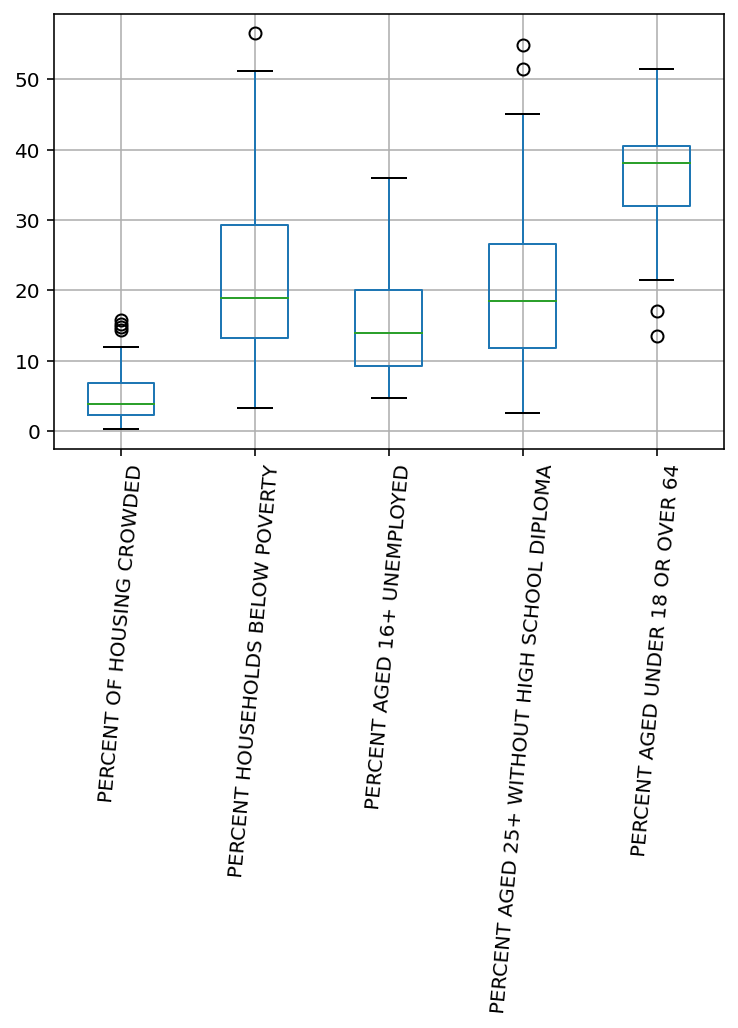

In [0]:
boxplot = df.boxplot(column=['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64'], rot=85)

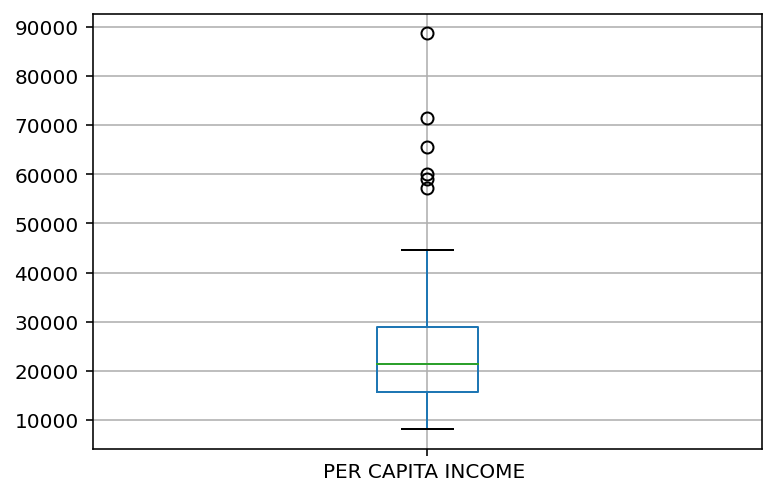

In [0]:
boxplot_hardship = df.boxplot(column='PER CAPITA INCOME ')
boxplot_hardship

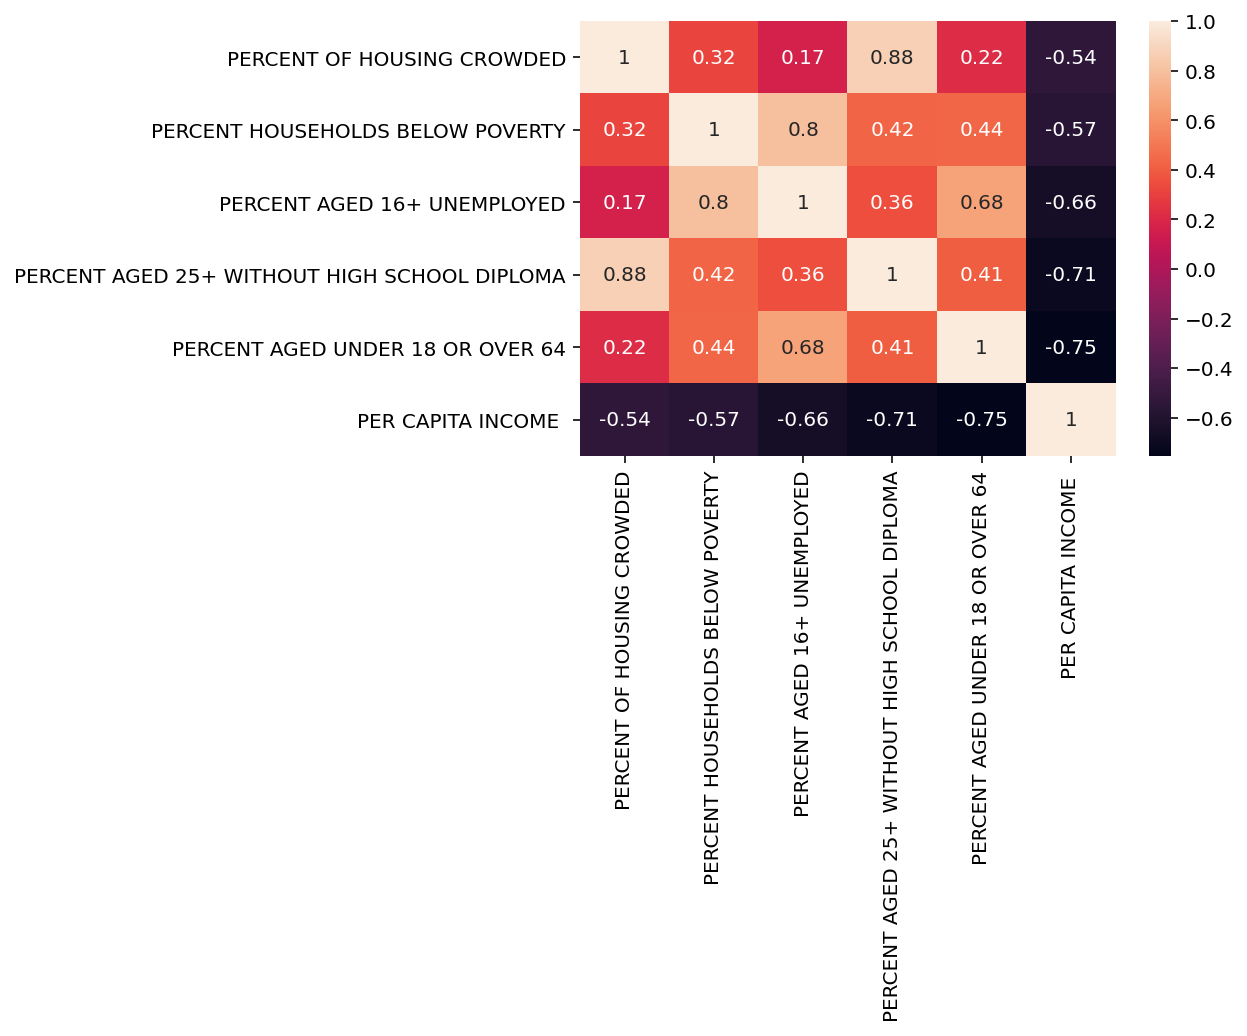

In [0]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


corr_df = df[['PERCENT OF HOUSING CROWDED','PERCENT HOUSEHOLDS BELOW POVERTY','PERCENT AGED 16+ UNEMPLOYED','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA','PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ']]

correlation = corr_df.corr()
sn.heatmap(correlation, annot=True)
plt.show()

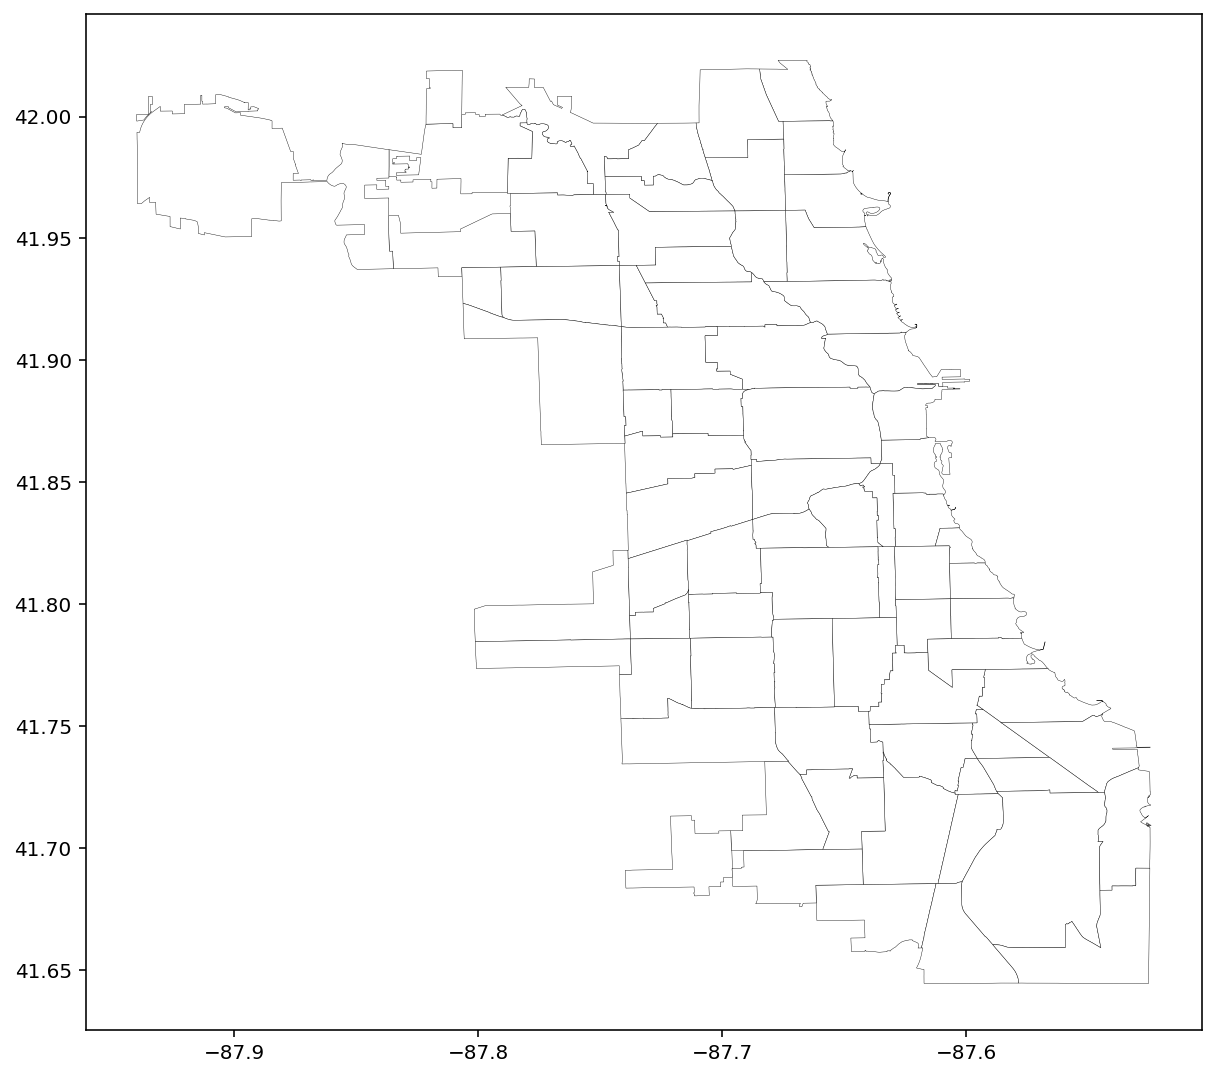

In [0]:
# Start map 
import geopandas as gpd
import geoplot

# community areas boundaries
communities_web = "https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=Shapefile"
communities = gpd.read_file(communities_web)

#test
communities.plot(
    figsize=(10,10), 
    linewidth=0.2, 
    color='white', 
    edgecolor='black'    
)



In [0]:
# https://data.cityofchicago.org/download/9wp7-iasj/application%2Fzip

In [0]:
communities.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [0]:
communities.shape

(77, 10)

In [0]:
communities.dtypes

area           float64
area_num_1      object
area_numbe      object
comarea        float64
comarea_id     float64
community       object
perimeter      float64
shape_area     float64
shape_len      float64
geometry      geometry
dtype: object

In [0]:
# join community areas to indicators
df.columns

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [0]:
# make area_num_1 in communities into an int
# same for comm num in df
df = df.astype({'Community Area Number':'int64'})
communities = communities.astype({'area_num_1':'int64'})

In [0]:
communities.dtypes

area           float64
area_num_1       int64
area_numbe      object
comarea        float64
comarea_id     float64
community       object
perimeter      float64
shape_area     float64
shape_len      float64
geometry      geometry
dtype: object

In [0]:
mapping_comm = pd.merge(df, communities, left_on='Community Area Number', right_on='area_num_1')
mapping_comm.head()
# choropleth map by income per capita


,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,0.0,1,1,0.0,0.0,ROGERS PARK,0.0,5.125990e+07,34052.397576,"POLYGON ((-87.65456 41.99817, -87.65574 41.998..."
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,0.0,2,2,0.0,0.0,WEST RIDGE,0.0,9.842909e+07,43020.689458,"POLYGON ((-87.68465 42.01948, -87.68464 42.019..."
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,0.0,3,3,0.0,0.0,UPTOWN,0.0,6.509564e+07,46972.794555,"POLYGON ((-87.64102 41.95480, -87.64400 41.954..."
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,0.0,4,4,0.0,0.0,LINCOLN SQUARE,0.0,7.135233e+07,36624.603085,"POLYGON ((-87.67441 41.97610, -87.67440 41.976..."
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,0.0,5,5,0.0,0.0,NORTH CENTER,0.0,5.705417e+07,31391.669754,"POLYGON ((-87.67336 41.93234, -87.67342 41.932..."


In [0]:
# choropleth map by income per capita

# re-convert mapping_com into geodataframe

mapping_comm = gpd.GeoDataFrame(mapping_comm)

#import geodataframe as gdf
#map = gpd.read_file(mapping_comm)

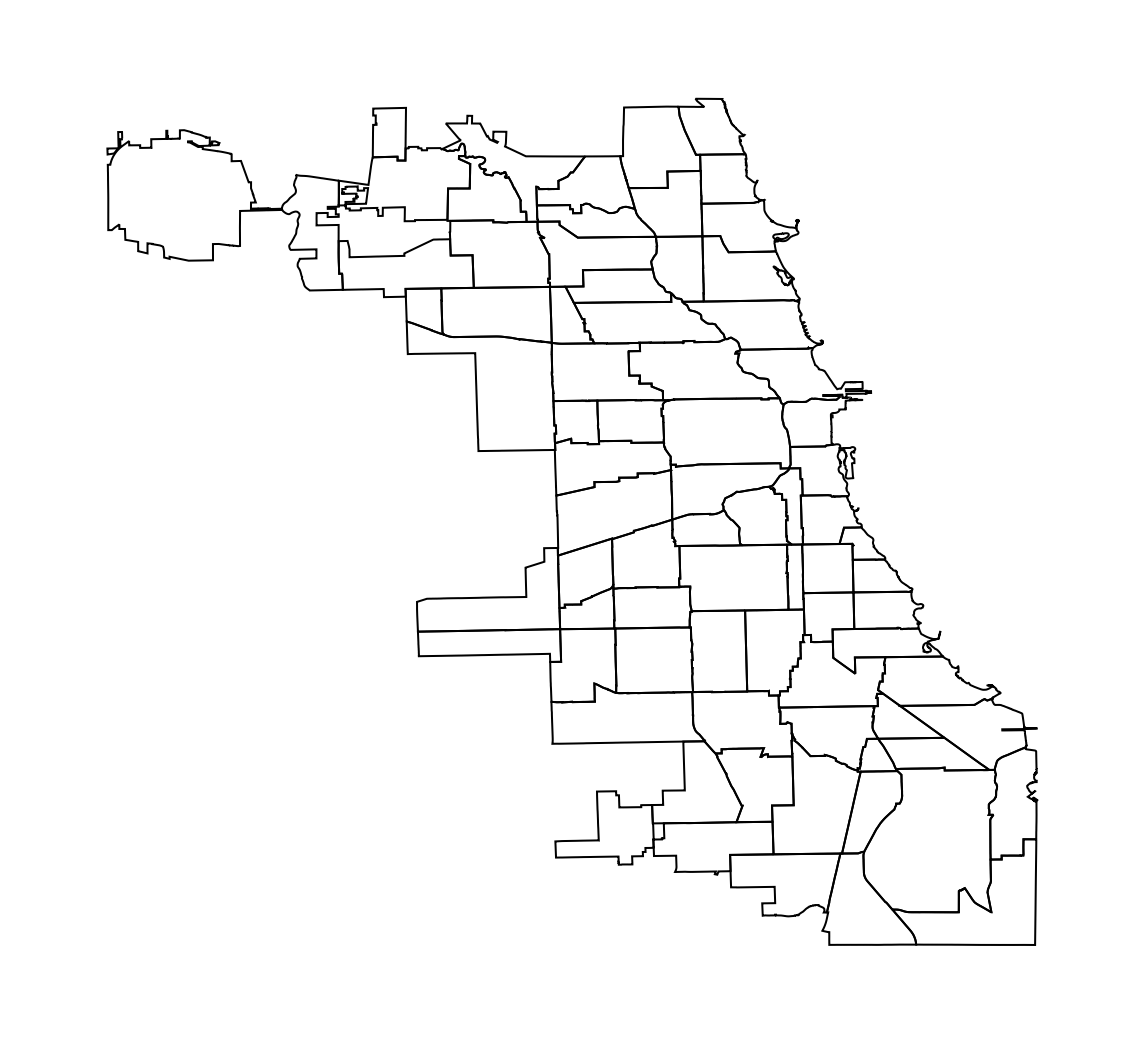

In [0]:
ax = geoplot.polyplot(mapping_comm, figsize=(10,10))
#mapping_comm.plot()

In [0]:
import mapclassify
mapclassify.NaturalBreaks(mapping_comm['PER CAPITA INCOME '], k=5)

NaturalBreaks               

      Interval         Count
----------------------------
[ 8201.00, 18881.00] |    33
(18881.00, 28887.00] |    25
(28887.00, 44689.00] |    13
(44689.00, 71551.00] |     5
(71551.00, 88669.00] |     1

In [0]:
mapclassify.UserDefined(mapping_comm['PER CAPITA INCOME '], bins=[10000,30000,50000, 70000,90000])

UserDefined                 

      Interval         Count
----------------------------
[ 8201.00, 10000.00] |     1
(10000.00, 30000.00] |    57
(30000.00, 50000.00] |    13
(50000.00, 70000.00] |     4
(70000.00, 90000.00] |     2

In [0]:
mapclassify.Quantiles(mapping_comm['PER CAPITA INCOME '], k=5)

Quantiles                   

      Interval         Count
----------------------------
[ 8201.00, 14765.80] |    16
(14765.80, 18238.20] |    15
(18238.20, 23879.80] |    15
(23879.80, 34181.80] |    15
(34181.80, 88669.00] |    16

In [0]:
scheme = mapclassify.NaturalBreaks(mapping_comm['PER CAPITA INCOME '], k=5)

AttributeError: ignored

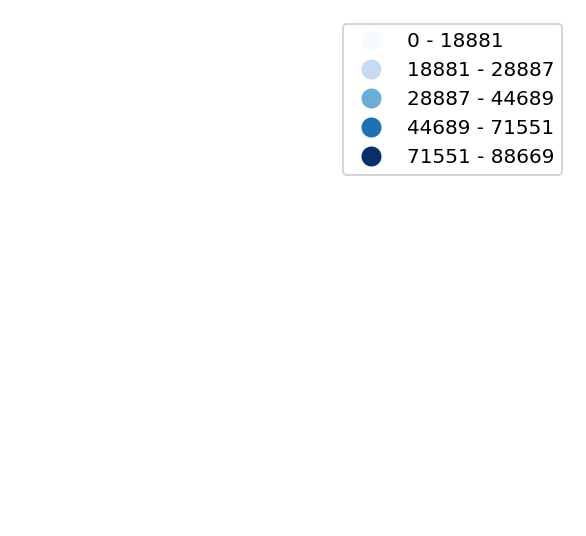

In [0]:
geoplot.choropleth(
    mapping_comm, hue=mapping_comm['PER CAPITA INCOME '], scheme=scheme,
    cmap='Blues', figsize=(5,5), legend=True, legend_kwds={'label':"Per Capita Income", 'orientation':"horizontal"}
)

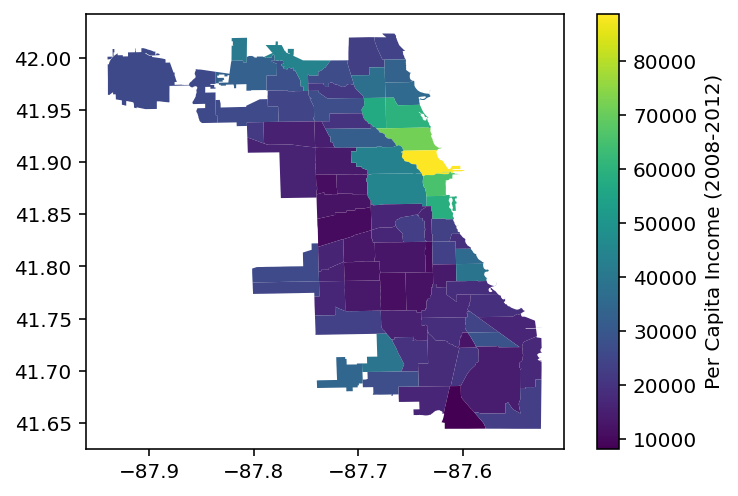

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
# legend_kwds={'label':"Per Capita Income (2008-2012)"}
mapping_comm.plot(column='PER CAPITA INCOME ', ax=ax, 
                  legend=True, legend_kwds={'label':"Per Capita Income (2008-2012)"})

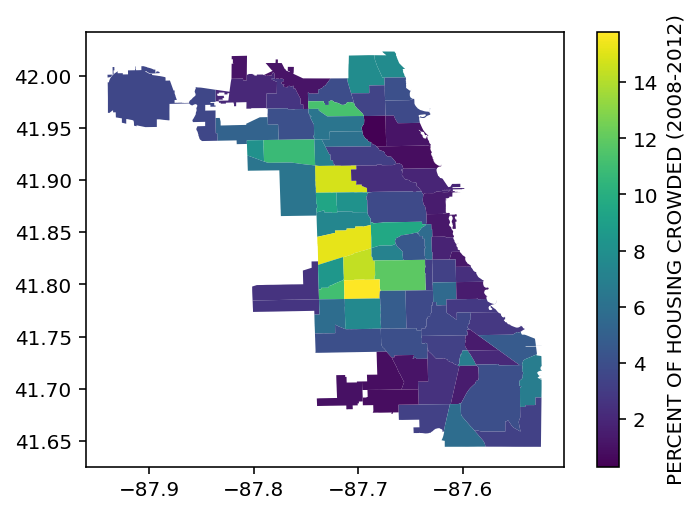

In [0]:
fig, ax = plt.subplots(1, 1)
# legend_kwds={'label':"Per Capita Income (2008-2012)"}
mapping_comm.plot(column='PERCENT OF HOUSING CROWDED', ax=ax, 
                  legend=True, legend_kwds={'label':"PERCENT OF HOUSING CROWDED (2008-2012)"})

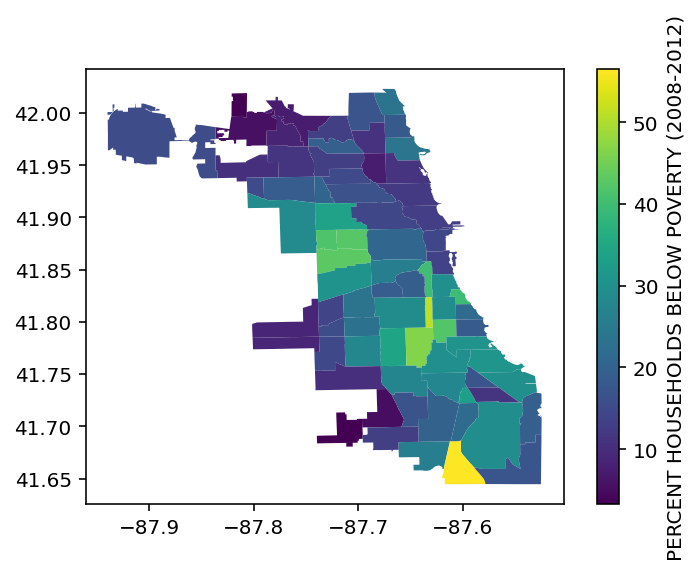

In [0]:
fig, ax = plt.subplots(1, 1)
# legend_kwds={'label':"Per Capita Income (2008-2012)"}
mapping_comm.plot(column='PERCENT HOUSEHOLDS BELOW POVERTY', ax=ax, 
                  legend=True, legend_kwds={'label':"PERCENT HOUSEHOLDS BELOW POVERTY (2008-2012)"})

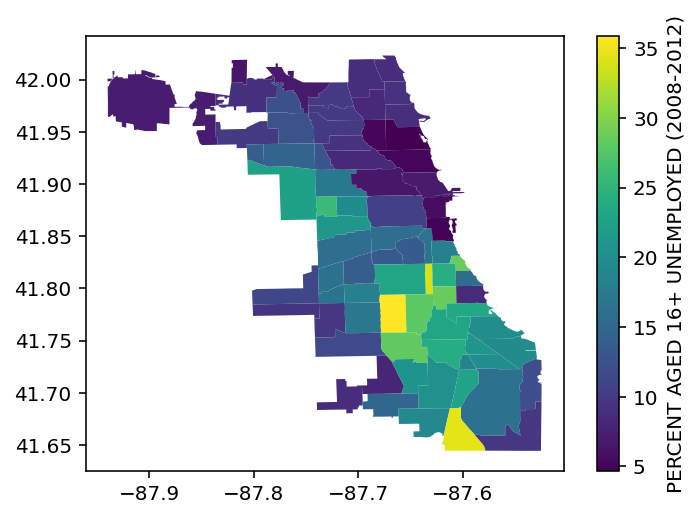

In [0]:
fig, ax = plt.subplots(1, 1)
# legend_kwds={'label':"Per Capita Income (2008-2012)"}
mapping_comm.plot(column='PERCENT AGED 16+ UNEMPLOYED', ax=ax, 
                  legend=True, legend_kwds={'label':"PERCENT AGED 16+ UNEMPLOYED (2008-2012)"})

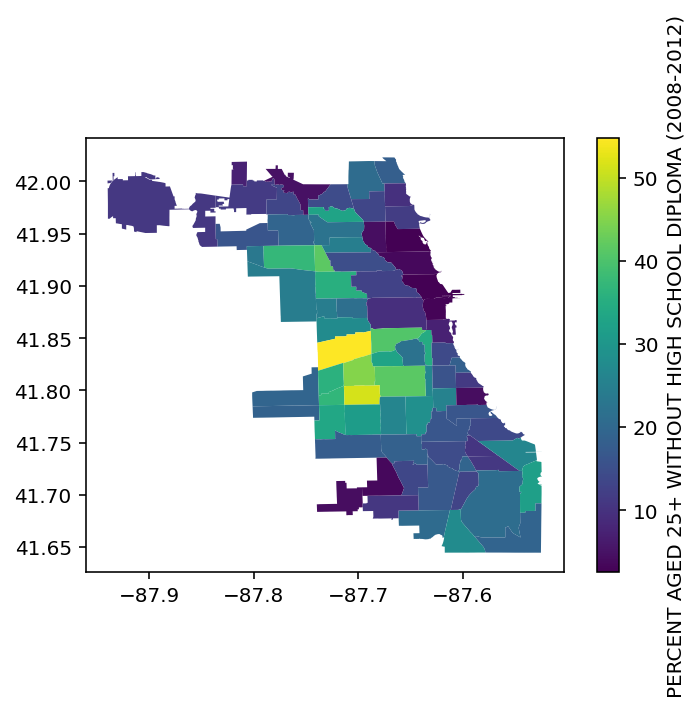

In [0]:
fig, ax = plt.subplots(1, 1)
# legend_kwds={'label':"Per Capita Income (2008-2012)"}
mapping_comm.plot(column='PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', ax=ax, 
                  legend=True, legend_kwds={'label':"PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA (2008-2012)"})

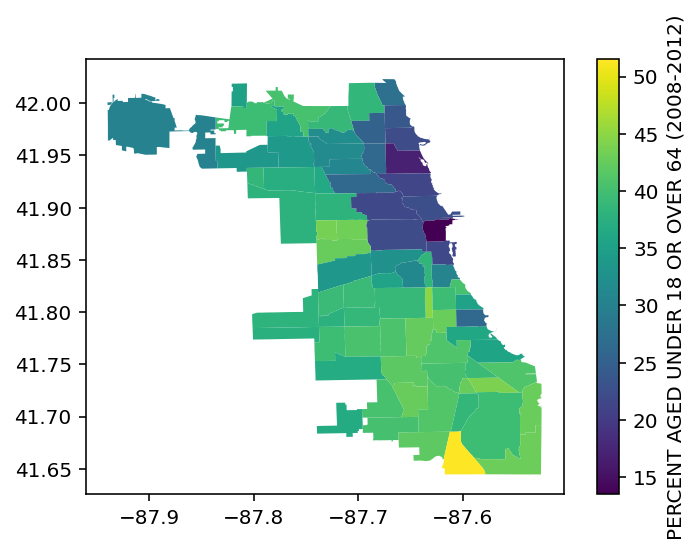

In [0]:
fig, ax = plt.subplots(1, 1)
# legend_kwds={'label':"Per Capita Income (2008-2012)"}
mapping_comm.plot(column='PERCENT AGED UNDER 18 OR OVER 64', ax=ax, 
                  legend=True, legend_kwds={'label':"PERCENT AGED UNDER 18 OR OVER 64 (2008-2012)"})

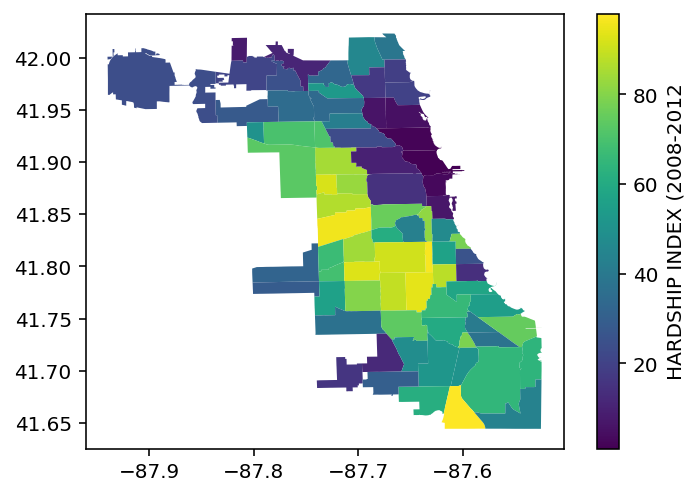

In [0]:
fig, ax = plt.subplots(1, 1)
# legend_kwds={'label':"Per Capita Income (2008-2012)"}
mapping_comm.plot(column='HARDSHIP INDEX', ax=ax, 
                  legend=True, legend_kwds={'label':"HARDSHIP INDEX (2008-2012"})

In [0]:
mapping_comm.columns

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'area', 'area_num_1', 'area_numbe', 'comarea',
       'comarea_id', 'community', 'perimeter', 'shape_area', 'shape_len',
       'geometry'],
      dtype='object')